Task 1: introduction

The Titanic Tragedy is well-known disaster that occurred on the ship Titanic in April 15, 1912, during Titanic's voyage from Southampton to New York. It happened after the ship hit an ice berg, causing it to sink with 2224 passengers, a significant number of them died.
The Titanic Dataset provides information about each passenger on ther ship: their age, name, gender, etc. The size of the dataset is 891 rows and 12 columns.
The goal of this project is to clean, preprocess, and explore the Titanic dataset to uncover patterns in passenger survival and characteristics. This involves handling missing values, transforming features, and visualizing the data to better understand which factors influenced survival.

In [2]:
#Task 2:  Data Loading & Initial Exploration
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Titanic-dataset.csv')
df.shape
df.info()


#Task 3: Data Cleaning and preprocessing
df.isnull().sum()
df.drop(['Name','Cabin','Ticket'], axis=1, inplace=True)
df.rename(columns={ 'SibSp': 'Siblings&Spouses', 'Parch': 'Parents&Children'}, inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Sex,Age,Siblings&Spouses,Parents&Children,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


For Task 2, I used pandas to read the dataset using pd.read_csv(). I printed the first 5 rows using the .head(), then used the .shape to know the number of columns and rows in the dataset, along with .info() and .describe() to identify it more.
As for Task 3, I used .isnull() to find null values and used .sum() to find which column or data has the most null values. Then I used .drop() to drop the one with the most null values which is the 'Cabin', but also dropped 'Name','Ticket', and 'Fare' because they aren't important in our dataset as they don't answer any questions about survival rate.
Then I renamed SibSP to Siblings&Spouses, and Parch to Parents&Children to make them more obvious. Also, I turned the gender to numeric data to make it more accessible and helpful.

In [3]:
#Task 4 or 5: Exploratory Data Analysis (EDA)
print(df['Survived'].value_counts())
print(df['Pclass'].value_counts())
print(df['Sex'].value_counts())
print(df['Age'].value_counts())
print(df['Siblings&Spouses'].value_counts())
print(df['Parents&Children'].value_counts())
df.describe()

Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Sex
0    577
1    314
Name: count, dtype: int64
Age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64
Siblings&Spouses
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parents&Children
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


,PassengerId,Survived,Pclass,Sex,Age,Siblings&Spouses,Parents&Children,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


I printed the value counts to notice any frequency or patterns in the data. for example: that the number of survivors is significantly below the number of deceased individuals by nearly 200.
Also, we notice that the number of female individuals are also significantly less than the number of males.
In the age, we notice a range from 18 to 30 with outlier of 0.42, 0.67 which are children, and 74 which is an elderly person. We also notice that the majority are 24, while the mean (collected from task 2) is 29.6.
We also notice that the majority were not on Titanic with siblings or spouses, and the same goes with parents or children.
Also, the .describe() helps spot the outliers better through the min and max properties.

([<matplotlib.axis.XTick at 0x21e9eaa9090>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

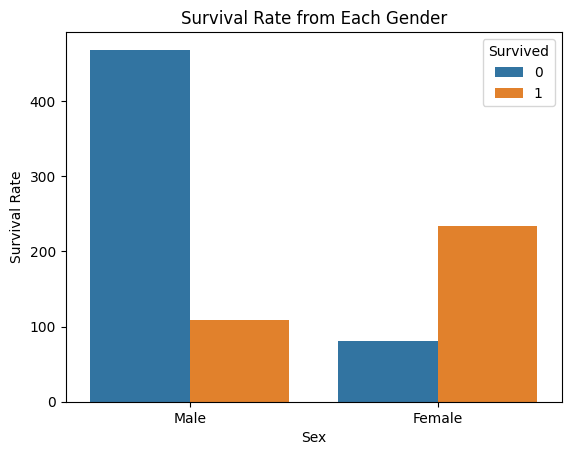

In [80]:
#Task 5/6 Visualization and Finding Relationships Between Data

sns.countplot(data=df, x='Sex',hue='Survived')
plt.title('Survival Rate from Each Gender')
plt.ylabel('Survival Rate')
plt.xticks([0, 1], ['Male', 'Female'])

This count plot shows the vast difference between the female individuals who survived and the male ones.

In [4]:
female_df = df[df['Sex'] == 1]
print(female_df['Survived'].value_counts())

Survived
1    233
0     81
Name: count, dtype: int64


In [3]:
"""male_df = df[df['Sex'] == 0]
print(male_df['Survived'].value_counts())"""
print(df[df['Sex']==0]['Survived'].value_counts())

Survived
0    468
1    109
Name: count, dtype: int64


Text(0, 0.5, 'Rate')

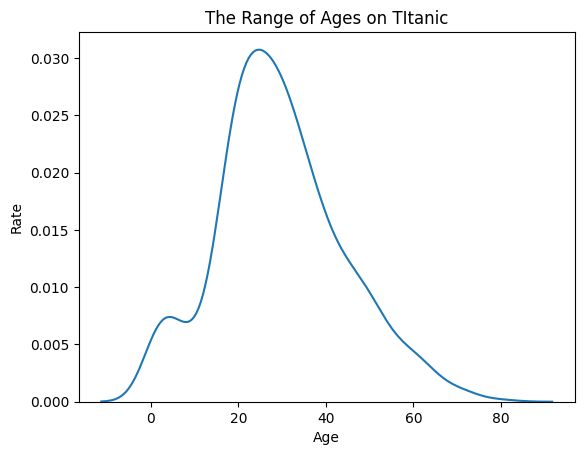

In [90]:
sns.kdeplot(data=df, x='Age')
plt.title('The Range of Ages on TItanic')
plt.ylabel('Rate')

This also shows  the outliers and mean of the Age property better.

([<matplotlib.axis.XTick at 0x21ea05dbb10>,
 [Text(0, 0, 'Deceased'), Text(1, 0, 'Survived')])

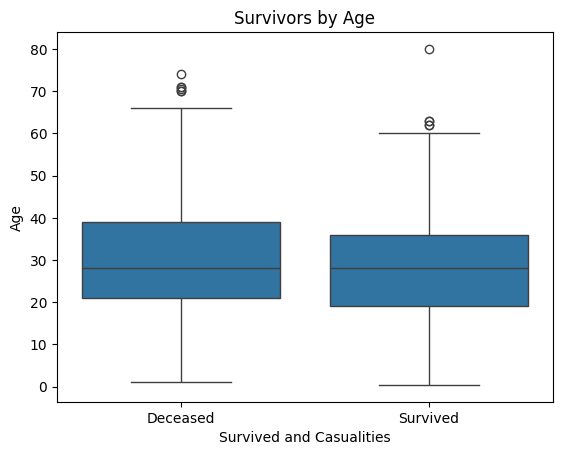

In [93]:
sns.boxplot(data=df, x='Survived', y='Age')
plt.title('Survivors by Age')
plt.xlabel('Survived and Casualities')
plt.xticks([0, 1], ['Deceased', 'Survived'])

The previous box plot shows that the survived individuals were likely younger than the deceased ones, with outliers of elderly people for both sides.

Text(0, 0.5, 'Survival Rate')

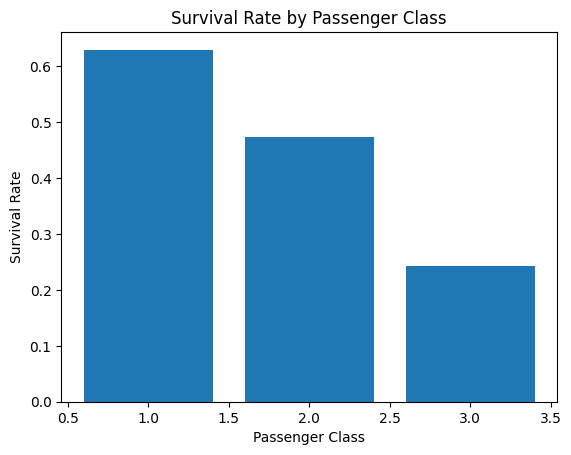

In [6]:
survival_rates = df.groupby('Pclass')['Survived'].mean()

plt.bar(survival_rates.index, survival_rates.values)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')


this bar plot shows that passengers with higher classes were more likely to survive.

<Axes: xlabel='Pclass', ylabel='Fare'>

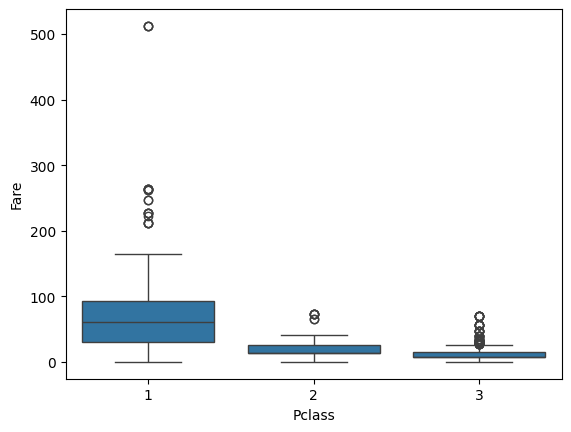

In [97]:
sns.boxplot(data=df, x='Pclass',y='Fare')

This box plot also shows that the higher the class the more fare paid, with an outlierof the 1st class being over 500.

CONCLUSION:
-According to the first plot, we see that female individuals were more likely to survive than males, as males' death toll exceeded 500, while only a hundred (approximately) survived. Meanwhile females had a death toll of less than a hundred, and more than 200 survived. 
-Using the numbers obtained in the cells below the first plot, we conclude that females had a survival rate of 74.2%. Males had a survival rate of 18.8%.
-The 'Survivors by Age' plot shows that the survivors were likely younger than the deceased, as the box plot of the deceased individuals shows that the death toll had more people in their early forties or late thirties, while the survivors had more individuals being in their ealy twenties or below.
-The 'Range of Ages on Titanic' plot, however, shows that the mean or majority of people on Titanic were in their late twenties.
-What was shocking to find out was that in the 'Survivors by Age' plot, there were outliers of deceased elderly, although they should have been a priority of the rescue team.
-According to the Passenger Class plot and the Pclass-fare plot, it shows that the higher the class the more prioritized an individual was due to the prices they paid.
-Combining these points, we find out that survivors were more likely: females who are younger in age and in first class. This is proven as Rose was more likely to survive than Jack.
-

--------------------------------------------------------------------------------------------------------------------------

BONUS!!
1-Answer\ The survival rate of everyone on the ship is 38.38%
Technique used & explanation\ <<code below>> , or mathematically: 342/891

In [15]:
print(df['Survived'].value_counts(1))

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


2-Answer\Yes, as specified above, as females had more chance of surviving than males.
Technique used & explanation\ <<code below>> , or mathematically: females=233/314   males=109/577

In [21]:
female_df = df[df['Sex'] == 1]
print("Females survived:",female_df['Survived'].value_counts(1))

male_df = df[df['Sex'] == 0]
print("Males survived:",male_df['Survived'].value_counts(1))

Females survived: Survived
1    0.742038
0    0.257962
Name: proportion, dtype: float64
Males survived: Survived
0    0.811092
1    0.188908
Name: proportion, dtype: float64


3-Answer\Yes, as specified above, as first class had more chance of surviving than second and third classes.
Technique used & explanation\ <<code below>> , or mathematically: 1st class=136/216    2nd class=87/184     3rd class=119/491

In [27]:
frstCls_df = df[df['Pclass'] == 1]
print("First class survived:",frstCls_df['Survived'].value_counts(1))

secCls_df = df[df['Pclass'] == 2]
print("Second class survived:",secCls_df['Survived'].value_counts(1))

thrdCls_df = df[df['Pclass'] == 3]
print("Third class survived:",thrdCls_df['Survived'].value_counts(1))

First class survived: Survived
1    0.62963
0    0.37037
Name: proportion, dtype: float64
Second class survived: Survived
0    0.527174
1    0.472826
Name: proportion, dtype: float64
Third class survived: Survived
0    0.757637
1    0.242363
Name: proportion, dtype: float64


4-Answer\ Survivors' ages ranged from 0.42 years old (around 5 months old) to 80 years old, with a mean of 28.3. While non-survivors were between 1 year old to 74 years old with a mean of 30.6. The mean indicates that the survivors were younger.
Technique used & explanation\ <<code below>>

In [29]:
print("Age Distribution for Survivors:")
print(df[df['Survived'] == 1]['Age'].describe())

print("Age Distribution for Non-Survivors:")
print(df[df['Survived'] == 0]['Age'].describe())

Age Distribution for Survivors:
count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64
Age Distribution for Non-Survivors:
count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64


5-Answer\ C indicating Cherbourg had the highest survival rate, while Southampton S had the lowest survival rate.
Technique used & explanation\<<code below>> by calculating the mean.

In [33]:
survivalPort = df.groupby('Embarked')['Survived'].mean()
print(survivalPort)

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


6-Answer\Yes, the higher the paid fare, the higher the survival rate.
Technique used & explanation\<<code below>> Showing the relationship between the fare and the survivors and non-survivors. the average fare that the survivors paid are more than double the average fare that non-survivors paid.

In [38]:
df.groupby('Survived')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


Text(0, 0.5, 'Fare Paid')

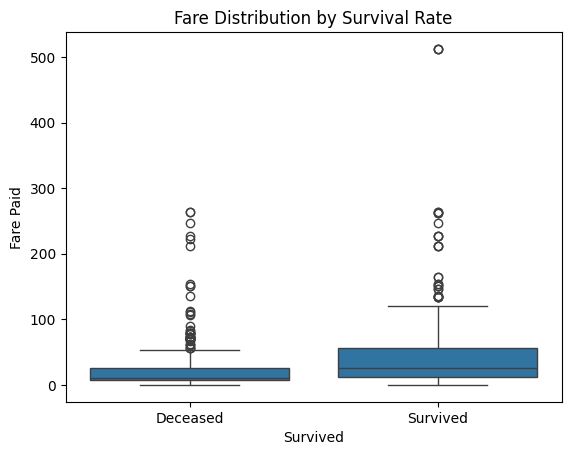

In [40]:
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title("Fare Distribution by Survival Rate")
plt.xlabel("Survived")
plt.xticks([0, 1], ['Deceased', 'Survived'])
plt.ylabel("Fare Paid")

7-Answer\ Yes, as children had a 53.9% of surviving.
Technique used & explanation\ <<code below>> explains that if False: the individual is an adult above 18. True: is otherwise. 

In [47]:
df.groupby(df['Age']<18)['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
False,778.0,0.361183,0.480652,0.0,0.0,0.0,1.0,1.0
True,113.0,0.539823,0.500632,0.0,0.0,1.0,1.0,1.0


In [ ]:
----------------------------------DONE----------------------------------